# How UKWA Works

The UK Web Archive (UKWA) collects millions of websites each year, and have been collecting websites since 2005. We do this for posterity, but also for readers and researchers today.

We enable curators and collaborators to define what we should collect, and how often. We attempt to visit every UK website at least once a year, and for the sites the curators have identified we can visit much more frequently. For example, we collect news sites at least once per day.

We capture the websites using web crawling software, and converting the live sites into static records we can preserve for the future.

We use these records to reconstruct an imperfect facsimile of the original live site, allowing our readers and researchers to browse the UK web as it was in the past. We can also analyse these historical records as data, to extract historical trends, or to build access tools.

## Use Cases

For our Readers, we want them to be able to:

- **View** archive web pages as the were in the past, if they know what URL they are interested in.
- **Browse** curated collections of archived web pages and sites.
- **Search** for web pages to find what they need.
- **Analyse** our archived web pages, exploring the collection as a dataset.

To meet these needs, we need to populate the archive. To do this, our _Archivists_ and _Curators_ need to:

- **Collect** live web pages, by directing our web crawlers to capture them on various frequencies.
- **View** what the archived web pages the crawler collected, to check how well it's working.
- **Describe** the archived web pages and sites, to help document today's web and make it easier for _Readers_ to find.

## High-Level Technical Architecture

These use cases are supported by a set of _access_, _ingest_ and _management_ systems. To get an idea of the overall technical architecture, we won't start with an attempt to enumerate every component involved. First, we'll break it down as a set of larger technical areas, using the names we tend to use when discussing them.

To give some insight into the nature of the underlying technical systems, we'll use a [Wardley map](https://learnwardleymapping.com/home/introduction/) and grade them on a scale they reflects how well understood and widely used they are.


In [6]:
%load_ext ipywardley

The ipywardley extension is already loaded. To reload it, use:
  %reload_ext ipywardley


In [7]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

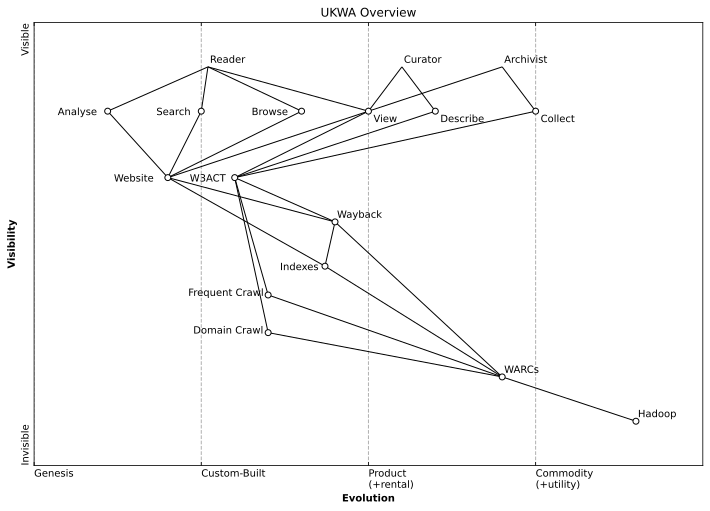

In [41]:
%%wardley
title UKWA Overview

anchor Archivist [0.9,0.7]
anchor Curator [0.9,0.55]
anchor Reader [0.9,0.26]

component Collect [0.8, 0.75] label [5, -13]
component Describe [0.8, 0.6] label [5, -13]
component View [0.8,0.5] label [5, -13]
component Browse [0.8,0.4] label [-50, -6]
component Search [0.8,0.25] label [-45, -6]
component Analyse [0.8,0.11] label [-50, -6]

Archivist->Collect
Archivist->View
Curator->Describe
Curator->View
Reader->View
Reader->Browse
Reader->Search
Reader->Analyse

component Website [0.65,0.2] label [-54, -6]
component W3ACT [0.65,0.3] label [-45, -6]
component Wayback [0.55,0.45]

Collect->W3ACT
Describe->W3ACT
View->Website
View->W3ACT
Browse->Website
Search->Website
Analyse->Website

component Indexes [0.45, 0.435] label [-45, -6]
component Frequent Crawl [0.385, 0.35] label [-80, -3]
component Domain Crawl [0.3, 0.35] label [-75, -3]
component WARCs [0.2,0.7]

Website->Indexes
Website->Wayback
Wayback->Indexes
Wayback->WARCs

W3ACT->Wayback
W3ACT->Frequent Crawl
W3ACT->Domain Crawl

Frequent Crawl->WARCs
Domain Crawl->WARCs
WARCs->Indexes

component Hadoop [0.1, 0.9]

WARCs->Hadoop

style plain

### Information Flows

The _ingest_ information flow, for _Archivists_ and _Curators_, is as follows:

1. The _Archivists_ and _Curators_ use the _W3ACT (WWW Annotation & Curation Tool) Service_ to configure the crawl parameters that say which sites to crawl, when, and how.
2. The Frequent Crawl system takes the crawl definitions from _W3ACT_ and attempts to crawl the specified sites.
3. The Domain Crawl runs once a year and attempts to crawl all UK sites.
4. Both crawler services capture the results as [WARC](https://iipc.github.io/warc-specifications/specifications/warc-format/warc-1.1/) files and log files which are tranferred to our [Hadoop](https://en.wikipedia.org/wiki/Apache_Hadoop) cluster.
5. Indexing tasks run over those WARC files, creating indexes that allow us to find archived URLs.
6. The _Wayback Service_ uses the indexes and the WARC files to replay the archived web pages.
7. The _W3ACT Service_ makes all web pages available for inspection.
8. The _Curators_ add or update the metadata that describes the content that has been collected. This includes license agreements with website owners to facilitate capture and/or open access to the archived material.

For _Readers_, the overall _access_ flow is:

1. Our _Readers_ come to the _Website_, either directly or via links or metadata in other discovery systems.
2. They can lookup URLs of interest, and play them back via the _Wayback Service_. Note that in library reading rooms they will have full access to the content, whereas the public _Website_ only gives access suitably-licensed material.
3. They can browse the collections of archived pages via the _'Topics & Themes'_ section of the _Website_.
4. They can use full-text faceted search to find URLs of interest based on their content.
5. They can use trend analysis or download datasets in order to understand and analyse the archived web pages.

### Components, Customisation & Maturity

As indicated by the position of the services on the diagram above, the Hadoop cluster is entirely generic, and the WARC files are specific to web archiving, but generic across web archives.

The Wayback service and the indexes are also fairly generic across web archives, although not quite as widely used as the WARC format.

The crawl systems are based on the Internet Archive's [Heritrix3](https://github.com/internetarchive/heritrix3) crawler, but a number of additional modules added to support our specific needs and remit.

The end-user systems are the most heavily custom-built components, with the website itself being the most recent and least mature.